# 1. Load_digits : 손글씨 분류

## 1.1 필요한 모듈 import하기

In [37]:
import sklearn                             # sklearn을 불러온 후
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

print(sklearn.__version__)          # sklearn 라이브러리 버전 확인

1.0.2


In [11]:
from sklearn.datasets import load_digits         # digits는 손글씨를 의미한다.
# sklearn은 사이킷런의 준말이며 앞으로 작성할 때 이렇게 작성할 것이다.
# from A import B 구문을 통해 사이킷런 데이터셋 중 digit에 관한 파일을 로드한다.



# 1.2. 데이터 준비 및 이해하기

In [17]:
digits = load_digits()
print(dir(digits))
# dir()은 객체가 어떤 변수와 메서드를 가지고 있는지 나열한 것이다. 프린트 하게 되면 담고 있는 변수와 메서드가 알파벳 순으로 정렬됨을 알 수 있다.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


Digits의 경우는 data, target, frame, target_names, DESCR, feature_names, frame의 7개의 key를 담고 있음을 알 수 있다.

In [18]:
digits.keys()                # digits dataset이 어떤 정보를 담고 있는지에 대한 key를 불러오는 기능을 한다.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [19]:
digits_data = digits.data

print(digits_data.shape)

(1797, 64)


shape를 붙여서 배열의 정보를 출력해보니 무려 1797개의 데이터가 64개의 숫자를 담고 있었다. 0번 인덱스의 digit 데이터를 뽑아서 확인해보면!!

In [20]:
digits_data[0]         # 0번 인덱스의 데이터 색출

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

64개의 숫자로 이루어진 array가 출력되었다. 이 데이터셋을 이해하기 위해서는 64개의 숫자가 어떤 의미를 담고 있는지를 이해할 필요가 있다.

손글씨 데이터는 이미지 데이터이므로 각 숫자는 pixel값을 의미한 것이다. 길이 64의 숫자 배열은 사실 8 X 8 크기의 이미지를 일렬로 쭉 펴 놓은 것이다.



In [22]:
digits_label = digits.target                # digits 데이터를 타켓 변수에 저장하는 과정
print(digits_label.shape)                   # label의 데이터 형태를 출력해보디 1차원 1797개의 데이터 존재
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

이제 이미지가 어떻게 생겼을지 한 번 확인해 보자. 이미지를 보기 위해서는 matplotlib라는 라이브러리가 필요하다. 또한 이미지를 현재 화면에 보여주기 위해 %matplotlib inline이라는 코드를 추가한다.

이미지는 다음과 같이 간단히 확인할 수 있다. 다만, 다만, 일렬로 펴진 64개 데이터를 (8, 8)로 reshape해주는 것을 잊으면 안 된다.

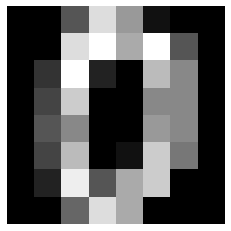

In [27]:
import matplotlib.pyplot as plt    # 이미지화 데이터 시각화를 돕는 라이브러리. as 뒤에 plt를 적음으로써 matplot 대신 plt로 대신 나타낸다.
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')   # 64개의 데이터를 8,8로 reshape하는 과정을 나타냄.
plt.axis('off')         # 여기에서 axis('off')를 붙여주면 좌표가 사라지고 이미지만 보여지게 된다.
plt.show()

0처럼 생긴 이미지가 보이는 것을 확인할 수 있다.

여러 개의 이미지를 한번에 확인하기 위해 for 반복문을 활용해 보겠다.

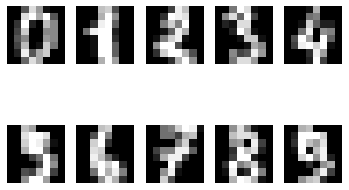

In [28]:
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
  plt.axis('off')
plt.show()

해상도가 낮긴 하지만 우리는 0부터 9까지의 숫자를 형상화 시켜보았다. target의 데이터도 확인해보자.

In [30]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

총 1797개의 데이터가 있는데 0부터 9까지의 숫자로 나타낸 것을 알 수 있다. 바로 각 이미지 데이터가 어떤 숫자를 나타내는지를 담고 있는 데이터이다.

각 이미지 데이터가 입력되었을 때 그 이미지가 숫자 몇을 나타내는 이미지인지를 맞추는 분류 모델을 학습시키는 것이 목표라는 것을 알게 되었다. 다만, 이번에는 정확도의 함정을 확인하는 실험이기 때문에 약간의 장치를 넣어볼 것이다.

숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 3인지 아닌지를 맞히는 문제로 변형해서 풀어보는 것이다. 즉 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델을 생각해 보자.


In [31]:
new_label = [3 if i == 3 else 0 for i in digits_label]
from sklearn.metrics import classification_reportnew_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

# 1.3. Train, Test 데이터 분리

모델 학습용 데이터를 train 데이터라고 하며 test 데이터는 말 그대로 데이터를 토대로 정답을 유추해 내기 위한 데이터이다. 
X_train, X_test, y_train, y_test를 생성하는 방법을 참고하여 다음과 같이 작성해 보았다. 붓꽃 예제에서 했던 방법과 거의 유사하게 의사결정 나무(decision tree) 모델을 구현해 보겠다.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, new_label, test_size=0.2, random_state=15)

# 1.4. 다양한 모델로 학습

### 1.4.1. Decision Tree 사용해보기

In [56]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 15)

DecisionTreeClassifier(random_state=15)

In [58]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

### 1.4.2 Random Forest 사용해보기

from A import B 구문을 활용하여 랜덤 포레스트를 불러들인다.


In [60]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       333
           3       1.00      0.78      0.88        27

    accuracy                           0.98       360
   macro avg       0.99      0.89      0.93       360
weighted avg       0.98      0.98      0.98       360



In [61]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9833333333333333

### 1.4.3 SVM 사용해 보기

SVM을 비롯하여 SGD Classifier 모델, 그리고 Logistic Regression은 코드가 거의 비슷하게 구성이 되어 있어서 어렵지 않게 작성할 수 있다. 구현해 보고자 하는 모델명만 주의해서 작성하면 된다.

In [47]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [48]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           3       1.00      0.96      0.98        27

    accuracy                           1.00       360
   macro avg       1.00      0.98      0.99       360
weighted avg       1.00      1.00      1.00       360



In [62]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9833333333333333

### 1.4.4 SGD Classifier 모델 사용

In [50]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [63]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           3       0.85      0.85      0.85        27

    accuracy                           0.98       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.98      0.98      0.98       360



In [64]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

### 1.4.5 Logistic Regression 사용하기

In [54]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [55]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           3       0.92      0.85      0.88        27

    accuracy                           0.98       360
   macro avg       0.95      0.92      0.94       360
weighted avg       0.98      0.98      0.98       360



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [65]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9777777777777777

1차 결론 : 다섯가지의 모델을 모두 돌려보니 정확도가 90%%를 넘었지만 조금씩 다르다는 것을 알 수 있었다. 5가지 모델에 대한 정확도를 코드 작성해서 돌려봤더니 Random Forest 모델과 SVM 모델의 정확도가 가장 높았던 것을 확인할 수 있었다. Decision Tree 모델이 93.9%로 이 5가지 학습 모델 중에서는 가장 정확도가 떨어지는 것 또한 확인이 가능했다.

모델을 구동시킨 후 표로 나오는 precision, recall, f1-score, support의 의미를 아직 완전히 이해하지 못하였지만 정확도를 구함으로써 어느 모델이 좀 더 높은 정확도를 끌어올릴 수 있는지를 알 수 있었던 소중한 시간이었다.

# 2. Load_wine : 와인분류

## 2.1. 필요한 모듈 import하기

In [66]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                              # 정확도를 구하고자 할 때 들여와야 하는 구문이다. accuracy_score로 import한다는 뜻이다.
from sklearn.metrics import classification_report

## 2.2. 데이터 준비

In [67]:
wine = load_wine()

print(dir(wine))
wine.keys()

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [68]:
wine_data = wine.data

print(wine_data.shape)

(178, 13)


# 2.3. 데이터 이해하기

In [71]:
wine_label = wine.target              # 와인 데이터를 타겟 변수에 저장하는 과정
print(wine_label.shape)               # label의 데이터 형태 출력. 1차원 178개 데이터 존재 확인
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [69]:
wine.target_names         # 와인 데이터의 타겟명을 불러보니 class 0,1,2가 나오는 것을 확인할 수 있다.

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [70]:
wine.feature_names    # 와인 데이터의 특성명을 불러보니 알코올이나 말릭산 등등 다양한 특성들이 나온다.

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [72]:
import pandas as pd

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df
# 와인 데이터셋을 pandas가 제공하는 DataFrame이라는 자료형으로 변환한 후 보여주는 구문이다.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [73]:
wine_df['label'] = wine.target               
wine_df
# label이라는 코드로 0~2까지의 숫자 데이터들로 구성된 라벨을 추가하여 데이터프레임을 다시 보여줬다.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 2.4. Train, Test 데이터 분리

In [74]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=7)

print('X_train 개수: ', len(X_train),'X_test 개수: ', len(X_test))

X_train 개수:  142 X_test 개수:  36


## 2.5. 다양한 모델로 학습시켜보기

In [75]:
# 2.5.1 Decision Tree 모델

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



0.9166666666666666

In [76]:
# 2.5.2 Random Forest 모델

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1.0

In [ ]:
# 2.5.3 SVM 사용해보기

from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
# 2.5.4 SGD 사용해보기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

In [77]:
# 2.5.5 Logistic Regression 사용해보기

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9722222222222222

# 2.6. 결론
와인 데이터셋에서도 역시 Random Forest 모델이 가장 학습 효율이 높은 것으로 드러났다. 학습 효율의 가장 중요한 척도가 되는 정확도(accuracy)를 비교하여 내린 결론이다. 정확도 비교 내역은 다음과 같다.

SVM < SGD < Decision Tree < Logistic Regression < Random Forest

# 3. Load_breast_cancer : 유방암 여부 진단


유방암 여부를 판별하는 이번 데이터셋에서는 필요한 모듈 import부터 모델 학습 및 예측(decision tree)을 한번에 노트로 정리해 보았다.

In [79]:
# (1) 필요한 모듈 import
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# (2) 데이터 준비
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [80]:
# (3) 데이터 이해하기
breast_cancer_label = breast_cancer.target     # 유방암 데이터를 타겟 변수에 저장하는 과정
print(breast_cancer_label.shape)               # label의 데이터 형태 출력. 1차원 569개 데이터 존재 확인

(569,)


In [81]:
breast_cancer.target_names      # 유방암의 타겟명은 악성(malignant), 양성(benign) 2가지가 존재함을 알 수 있다.
breast_cancer.feature_names          # 유방암의 특성명이다.

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [82]:
import pandas as pd

breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [83]:
breast_cancer_df['label'] = breast_cancer.target               
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [84]:
# (4) Train, Test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_label, test_size=0.2, random_state=7)
print('X_train 개수: ', len(X_train),'X_test 개수: ', len(X_test))

X_train 개수:  455 X_test 개수:  114


In [89]:
# (5.1) Decision Tree 모델

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 15)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



0.9473684210526315

In [88]:
# (5.2) Random Forest 모델

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



1.0

In [87]:
# (5.3) SVM 사용해보기

from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



0.9035087719298246

In [86]:
# 5.4 SGD 사용해보기

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.95      0.85      0.90        74

    accuracy                           0.88       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.89      0.88      0.88       114



0.8771929824561403

In [85]:
# 5.5 Logistic Regression 사용해보기

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9385964912280702

# 총론
지금까지 손글씨, 와인, 유방암 3가지 데이터셋을 가져와서 사이킷런에서 제공하는 5가지 학습모델을 통해 학습을 시켜 보는 실습을 해 보았다. accuracy, 즉 정확도가 학습 효율에 큰 영향이 미치는 것을 알게 되었으며 3가지 데이터셋 모두 공통적으로 5가지 학습모델 중 정확도가 가장 높은 Random Forest의 학습 효율이 가장 높음을 알 수 있었다. 하지만 precision, recall, f1-score, support에 관한 개념은 아직 이해가 되지 않아 머신 러닝에 대해 더 많이 공부해야겠다는 생각이 들었다.